In [ ]:
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# load dataset
df = pd.read_csv('Dry_Bean.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [ ]:
#seperating labels from dataset
X = df.iloc[:,:16].values
y = df.iloc[:,16:17].values

In [ ]:
print(X)

[[2.83950000e+04 6.10291000e+02 2.08178117e+02 ... 3.14728900e-03
  8.34222388e-01 9.98723889e-01]
 [2.87340000e+04 6.38018000e+02 2.00524796e+02 ... 3.56362400e-03
  9.09850506e-01 9.98430331e-01]
 [2.93800000e+04 6.24110000e+02 2.12826130e+02 ... 3.04773300e-03
  8.25870617e-01 9.99066137e-01]
 ...
 [4.21390000e+04 7.59321000e+02 2.81539928e+02 ... 1.88827100e-03
  6.76884164e-01 9.96767264e-01]
 [4.21470000e+04 7.63779000e+02 2.83382636e+02 ... 1.85202500e-03
  6.68236684e-01 9.95222420e-01]
 [4.21590000e+04 7.72237000e+02 2.95142741e+02 ... 1.63981200e-03
  6.16220592e-01 9.98179623e-01]]


In [ ]:
print(y)

[['SEKER']
 ['SEKER']
 ['SEKER']
 ...
 ['DERMASON']
 ['DERMASON']
 ['DERMASON']]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Perimeter vs Area')

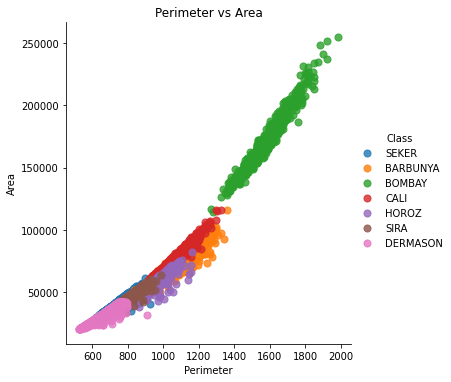

In [ ]:
sns.lmplot('Perimeter', 'Area',
           data=df,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('Perimeter vs Area')

In [ ]:
#normalizing data into numpy array
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

Normalized data:
[-0.84074853 -1.1433189  -1.30659814 -0.63115304 -1.56505251 -2.18572039
 -0.84145059 -1.0633406   0.28908744  0.36761352  1.42386706  1.83911641
  0.68078627  2.4021726   1.92572347  0.83837102]


In [ ]:
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

One hot encoded array:
[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
#split data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

In [ ]:
df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
#build model
model = Sequential()
model.add(Dense(28, input_dim=16, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28)                476       
_________________________________________________________________
dense_4 (Dense)              (None, 21)                609       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 154       
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
192/192 [==============================] - 1s 2ms/step - loss: 1.0062 - accuracy: 0.6926
Epoch 2/200
192/192 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.9018
Epoch 3/200
192/192 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9158
Epoch 4/200
192/192 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9200
Epoch 5/200
192/192 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9215
Epoch 6/200
192/192 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9232
Epoch 7/200
192/192 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9264
Epoch 8/200
192/192 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9251
Epoch 9/200
192/192 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9264
Epoch 10/200
192/192 [==============================] - 0s 1ms/step - loss: 0.1956 - accura

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
#score accuracy
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 93.02496328928046


In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=200, batch_size=64)

Epoch 1/200
192/192 [==============================] - 1s 3ms/step - loss: 0.1525 - accuracy: 0.9413 - val_loss: 0.1986 - val_accuracy: 0.9376
Epoch 2/200
192/192 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9416 - val_loss: 0.2033 - val_accuracy: 0.9310
Epoch 3/200
192/192 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9408 - val_loss: 0.1978 - val_accuracy: 0.9339
Epoch 4/200
192/192 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.9426 - val_loss: 0.2054 - val_accuracy: 0.9310
Epoch 5/200
192/192 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9405 - val_loss: 0.2012 - val_accuracy: 0.9332
Epoch 6/200
192/192 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9419 - val_loss: 0.1996 - val_accuracy: 0.9339
Epoch 7/200
192/192 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9407 - val_loss: 0.2053 - val_accuracy: 0.9310

In [ ]:
X = df.iloc[:,:16].values
y = df.iloc[:,16:17].values
# define model
# using Linear Discriminant Analysis
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.905 (0.008)


In [ ]:
# using Gaussian Naive Bayes
model = GaussianNB()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.764 (0.012)


In [ ]:
# using Quadratic Discrimination Analysis
model = QuadraticDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.911 (0.007)


In [ ]:
# using K Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=3)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.738 (0.013)


In [ ]:
# using SVC
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.929 (0.007)
